In [1]:
import numpy as np
import matplotlib.pyplot as plt

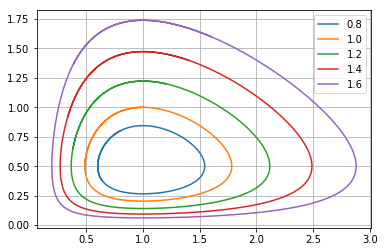

In [2]:
'''
Runge-Kutta 4
'''

# y: 2* T, 2代表着待求的函数有2个，T代表着分的时间片数目
y = np.zeros((2,10000))

# h为每个时间片的时间长短dt
h = 1e-3

# 参数。
param = {'a':2./3,
        'b' : 4./3,
        'd' : 1,
        'g' : 1}

# dy/dt = f(t;y),这里计算f
def f(j,param):
    return np.array([param['a'] * j[0] - param['b']*j[0]*j[1],\
            param['d'] * j[0] * j[1] - param['g']*j[1]])

# RK4算法的实现
def RK4(_y,init,param):
    h_num = np.shape(_y)[1]
    y = np.zeros_like(_y)
    y[0,0] = init[0]
    y[1,0] = init[1]
    for i in range(h_num-1):
        k1 = h*f(y[:,i],param)
        k2 = h*f(y[:,i]+k1/2,param)
        k3 = h*f(y[:,i]+k2/2,param)
        k4 = h*f(y[:,i]+k3,param)
        y[:,i+1] = y[:,i] + 1/6 * k1 + 1/3 * k2 + 1/3 * k3 + 1/6 * k4
    return y


# 改变初始值init 进行计算并画图
plt.figure()
init = np.array([0.8,0.8])
plt.plot(RK4(y,init,param)[0,:],RK4(y,init,param)[1,:],label='0.8')
init = np.array([1.,1.])
plt.plot(RK4(y,init,param)[0,:],RK4(y,init,param)[1,:],label='1.0')
init = np.array([1.2,1.2])
plt.plot(RK4(y,init,param)[0,:],RK4(y,init,param)[1,:],label='1.2')
init = np.array([1.4,1.4])
plt.plot(RK4(y,init,param)[0,:],RK4(y,init,param)[1,:],label='1.4')
init = np.array([1.6,1.6])
plt.plot(RK4(y,init,param)[0,:],RK4(y,init,param)[1,:],label='1.6')
plt.grid()
plt.legend()
plt.savefig('./RK4.png')
plt.show()

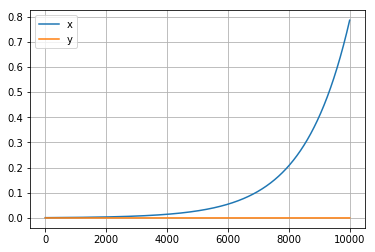

In [3]:
# 稳定点1，改变x值，发现x会不断增大，y保持不变
plt.figure()
init = np.array([1e-3,0])

plt.plot(range(10000),RK4(y,init,param)[0,:],label='x')
plt.plot(range(10000),RK4(y,init,param)[1,:],label='y')
plt.grid()
plt.legend()
plt.savefig('./1dx.png')
plt.show()

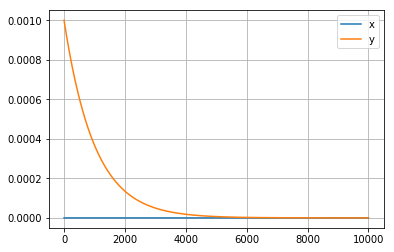

In [4]:
# 固定点1，改变y值，发现y会不断减小回到固定点，x保持不变
plt.figure()
init = np.array([0,1e-3])
plt.plot(range(10000),RK4(y,init,param)[0,:],label='x')
plt.plot(range(10000),RK4(y,init,param)[1,:],label='y')
plt.grid()
plt.legend()
plt.savefig('./1dy.png')
plt.show()

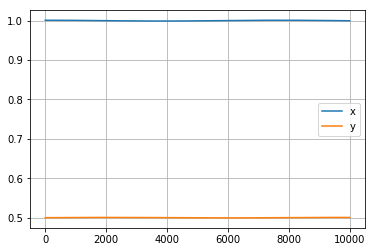

In [5]:
#固定点2，改变x值，x,y均无明显变化
plt.figure()
init = np.array([1+1e-3,0.5])
plt.plot(range(10000),RK4(y,init,param)[0,:],label='x')
plt.plot(range(10000),RK4(y,init,param)[1,:],label='y')
plt.grid()
plt.legend()
plt.savefig('./2dx.png')
plt.show()


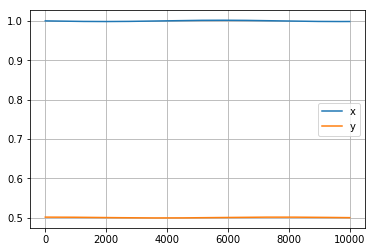

In [6]:
#固定点2，改变y值，x,y均无明显变化
plt.figure()
init = np.array([1,0.5+1e-3])
plt.plot(range(10000),RK4(y,init,param)[0,:],label='x')
plt.plot(range(10000),RK4(y,init,param)[1,:],label='y')
plt.grid()
plt.legend()
plt.savefig('./2dy.png')
plt.show()

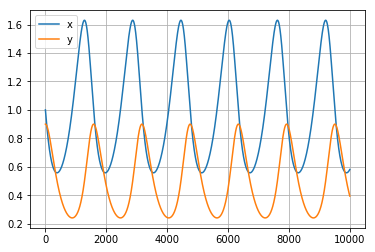

In [7]:
# 固定点2，改变y值（非小量），可以观察到周期性变化
h = 0.5e-2
plt.figure()
init = np.array([1,0.5+0.4])
plt.plot(range(10000),RK4(y,init,param)[0,:],label='x')
plt.plot(range(10000),RK4(y,init,param)[1,:],label='y')
plt.grid()
plt.legend()
plt.savefig('./dy.png')
plt.show()

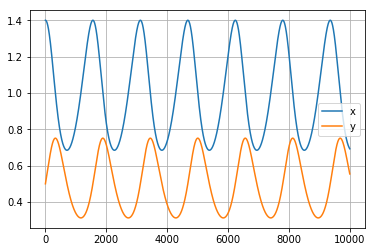

In [8]:
# 固定点2，改变x值（非小量），可以观察到周期性变化
h = 0.5e-2
plt.figure()
init = np.array([1+0.4,0.5])
plt.plot(range(10000),RK4(y,init,param)[0,:],label='x')
plt.plot(range(10000),RK4(y,init,param)[1,:],label='y')
plt.grid()
plt.legend()
plt.savefig('./dx.png')
plt.show()